In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('',train = True, download = True
                      , transform=transforms.Compose([
                          transforms.ToTensor()
                      ]))

test = datasets.MNIST('',train = False, download = True
                      , transform=transforms.Compose([
                          transforms.ToTensor()
                      ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10,shuffle=False)

In [2]:
import torch.nn as nn #your OOP
import torch.nn.functional as F #the functions

In [49]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() #run the initialization for nn.Module, same as nn.Module.__init__() 
        self.fc1 = nn.Linear(28*28, 64) #fully connected linear layer, format (input_nrs, output_nrs) 
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) 
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #use rectified linear function as activation function.
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.softmax(x,dim=1)
        
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [50]:
X = torch.rand((28,28)).view(-1, 28*28) #view is same as reshape in numpy, -1 specifies input will be of unknown shape.

In [51]:
output = net(X)
output

tensor([[0.1040, 0.1008, 0.0974, 0.1009, 0.0937, 0.1119, 0.1047, 0.1028, 0.1004,
         0.0833]], grad_fn=<SoftmaxBackward>)

In [63]:
data

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [70]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) 

EPOCHS = 3
 
for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels.
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = nn.CrossEntropyLoss()
        loss_output = loss(output, y)
        loss_output.backward()
        optimizer.step() #adjusts the weights for us.
    print(loss_output)

tensor(1.6886, grad_fn=<NllLossBackward>)
tensor(1.5612, grad_fn=<NllLossBackward>)
tensor(1.5611, grad_fn=<NllLossBackward>)


In [66]:
F.nll_loss(output, y)
print(X.view(-1,28*28))
print(output)
print(y)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[4.0058e-08, 2.5769e-10, 3.7100e-07, 9.7223e-06, 7.1895e-01, 1.6745e-03,
         8.7231e-10, 2.7936e-01, 4.9627e-14, 1.5596e-12],
        [1.1783e-13, 1.4832e-26, 1.0000e+00, 1.3677e-11, 1.4857e-18, 2.0809e-15,
         1.9535e-21, 3.5671e-21, 6.6527e-28, 5.9218e-30],
        [9.9659e-01, 6.7798e-14, 2.4870e-05, 2.3553e-07, 2.9129e-12, 3.3884e-03,
         2.6827e-13, 1.5005e-08, 1.8848e-16, 3.3424e-17],
        [3.8807e-11, 1.1131e-01, 1.8805e-06, 3.1084e-02, 2.1091e-01, 5.2157e-01,
         1.7207e-08, 1.2513e-01, 6.6050e-13, 3.2164e-13],
        [2.3564e-06, 1.2315e-14, 7.8026e-07, 5.2806e-11, 4.5939e-12, 1.0000e+00,
         1.9171e-10, 3.5363e-19, 1.1288e-24, 9.2270e-26],
        [9.0808e-10, 5.2383e-17, 9.5600e-10, 4.9522

In [71]:
correct = 0 
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1
            
print("Accuracy: ", round(correct/total,3))
            
    

Accuracy:  0.954


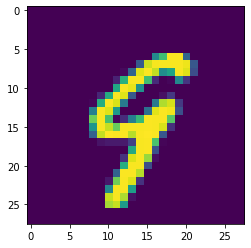

Predicted:  tensor(9)


In [48]:
import matplotlib.pyplot as plt
index = 2
plt.imshow(X[index].view(28,28))
plt.show()

print("Predicted: ", torch.argmax(net(X[index].view(-1,28*28))))